In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

print(tf.__version__)

2.3.0


In [4]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

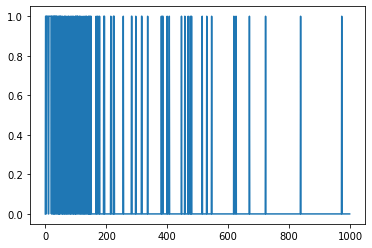

In [6]:
plt.plot(train_data[0])

In [7]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.6138 - accuracy: 0.6760 - binary_crossentropy: 0.6138 - val_loss: 0.4784 - val_accuracy: 0.8114 - val_binary_crossentropy: 0.4784
Epoch 2/20
49/49 - 0s - loss: 0.3936 - accuracy: 0.8415 - binary_crossentropy: 0.3936 - val_loss: 0.3544 - val_accuracy: 0.8512 - val_binary_crossentropy: 0.3544
Epoch 3/20
49/49 - 0s - loss: 0.3289 - accuracy: 0.8648 - binary_crossentropy: 0.3289 - val_loss: 0.3339 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3339
Epoch 4/20
49/49 - 0s - loss: 0.3117 - accuracy: 0.8718 - binary_crossentropy: 0.3117 - val_loss: 0.3303 - val_accuracy: 0.8612 - val_binary_crossentropy: 0.3303
Epoch 5/20
49/49 - 0s - loss: 0.3054 - accuracy: 0.8738 - binary_crossentropy: 0.3054 - val_loss: 0.3290 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3290
Epoch 6/20
49/49 - 0s - loss: 0.3020 - accuracy: 0.8752 - binary_crossentropy: 0.3020 - val_loss: 0.3300 - val_accuracy: 0.8589 - val_binary_crossentropy: 0.3300
Epoch 7/20
49/49 - 0s - loss

In [9]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [10]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.6200 - accuracy: 0.6821 - binary_crossentropy: 0.6200 - val_loss: 0.5296 - val_accuracy: 0.7759 - val_binary_crossentropy: 0.5296
Epoch 2/20
49/49 - 0s - loss: 0.4544 - accuracy: 0.8159 - binary_crossentropy: 0.4544 - val_loss: 0.4066 - val_accuracy: 0.8305 - val_binary_crossentropy: 0.4066
Epoch 3/20
49/49 - 0s - loss: 0.3706 - accuracy: 0.8465 - binary_crossentropy: 0.3706 - val_loss: 0.3602 - val_accuracy: 0.8487 - val_binary_crossentropy: 0.3602
Epoch 4/20
49/49 - 0s - loss: 0.3354 - accuracy: 0.8605 - binary_crossentropy: 0.3354 - val_loss: 0.3416 - val_accuracy: 0.8563 - val_binary_crossentropy: 0.3416
Epoch 5/20
49/49 - 0s - loss: 0.3189 - accuracy: 0.8690 - binary_crossentropy: 0.3189 - val_loss: 0.3373 - val_accuracy: 0.8558 - val_binary_crossentropy: 0.3373
Epoch 6/20
49/49 - 0s - loss: 0.3113 - accuracy: 0.8724 - binary_crossentropy: 0.3113 - val_loss: 0.3300 - val_accuracy: 0.8592 - val_binary_crossentropy: 0.3300
Epoch 7/20
49/49 - 0s - loss

In [11]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [12]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.4483 - accuracy: 0.7860 - binary_crossentropy: 0.4483 - val_loss: 0.3407 - val_accuracy: 0.8517 - val_binary_crossentropy: 0.3407
Epoch 2/20
49/49 - 0s - loss: 0.2920 - accuracy: 0.8791 - binary_crossentropy: 0.2920 - val_loss: 0.3240 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3240
Epoch 3/20
49/49 - 0s - loss: 0.2303 - accuracy: 0.9083 - binary_crossentropy: 0.2303 - val_loss: 0.3442 - val_accuracy: 0.8509 - val_binary_crossentropy: 0.3442
Epoch 4/20
49/49 - 0s - loss: 0.1171 - accuracy: 0.9632 - binary_crossentropy: 0.1171 - val_loss: 0.4114 - val_accuracy: 0.8482 - val_binary_crossentropy: 0.4114
Epoch 5/20
49/49 - 0s - loss: 0.0256 - accuracy: 0.9960 - binary_crossentropy: 0.0256 - val_loss: 0.5336 - val_accuracy: 0.8441 - val_binary_crossentropy: 0.5336
Epoch 6/20
49/49 - 0s - loss: 0.0050 - accuracy: 0.9999 - binary_crossentropy: 0.0050 - val_loss: 0.6229 - val_accuracy: 0.8505 - val_binary_crossentropy: 0.6229
Epoch 7/20
49/49 - 0s - loss

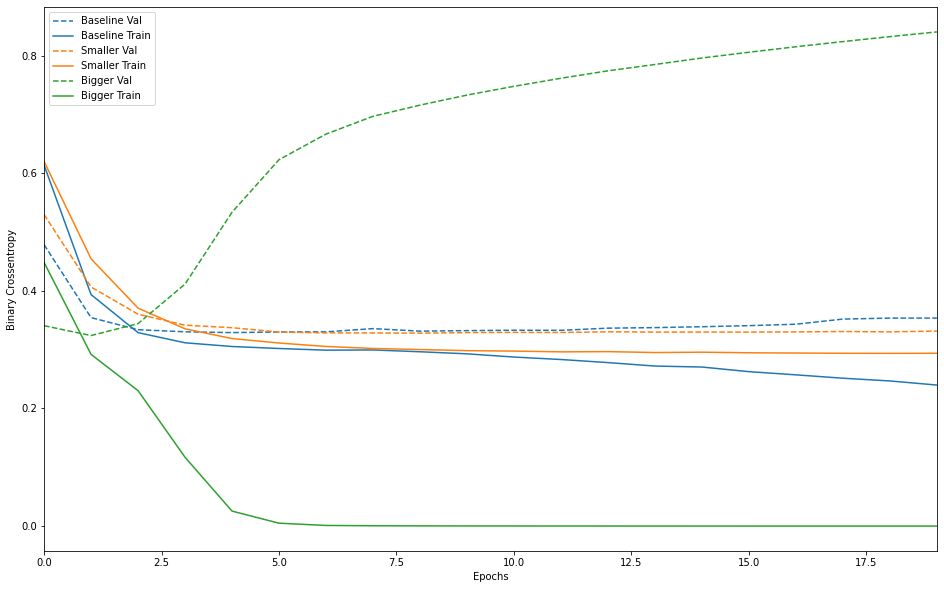

In [13]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

"간단한 모델"은 모델 파라미터의 분포를 봤을 때 엔트로피(entropy)가 작은 모델입니다. 따라서 과대적합을 완화시키는 일반적인 방법은 가중치가 작은 값을 가지도록 네트워크의 복잡도에 제약을 가하는 것입니다. 이는 가중치 값의 분포를 좀 더 균일하게 만들어 줍니다. 이를 **"가중치 규제"(weight regularization)**라고 부릅니다. 네트워크의 손실 함수에 큰 가중치에 해당하는 비용을 추가합니다. 이 비용은 두 가지 형태가 있습니다.
- l1 규제: 절댓값
- l2 규제: 제곱, 신경망에서는 L2 규제를 가중치 감쇠(weight decay)라고도 부릅니다.

In [18]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.5910 - accuracy: 0.7342 - binary_crossentropy: 0.5453 - val_loss: 0.4509 - val_accuracy: 0.8308 - val_binary_crossentropy: 0.4056
Epoch 2/20
49/49 - 0s - loss: 0.4026 - accuracy: 0.8530 - binary_crossentropy: 0.3575 - val_loss: 0.3880 - val_accuracy: 0.8559 - val_binary_crossentropy: 0.3436
Epoch 3/20
49/49 - 0s - loss: 0.3664 - accuracy: 0.8664 - binary_crossentropy: 0.3229 - val_loss: 0.3860 - val_accuracy: 0.8537 - val_binary_crossentropy: 0.3436
Epoch 4/20
49/49 - 0s - loss: 0.3518 - accuracy: 0.8732 - binary_crossentropy: 0.3105 - val_loss: 0.3676 - val_accuracy: 0.8618 - val_binary_crossentropy: 0.3274
Epoch 5/20
49/49 - 0s - loss: 0.3467 - accuracy: 0.8729 - binary_crossentropy: 0.3073 - val_loss: 0.3718 - val_accuracy: 0.8575 - val_binary_crossentropy: 0.3334
Epoch 6/20
49/49 - 0s - loss: 0.3412 - accuracy: 0.8753 - binary_crossentropy: 0.3037 - val_loss: 0.3679 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3313
Epoch 7/20
49/49 - 0s - loss

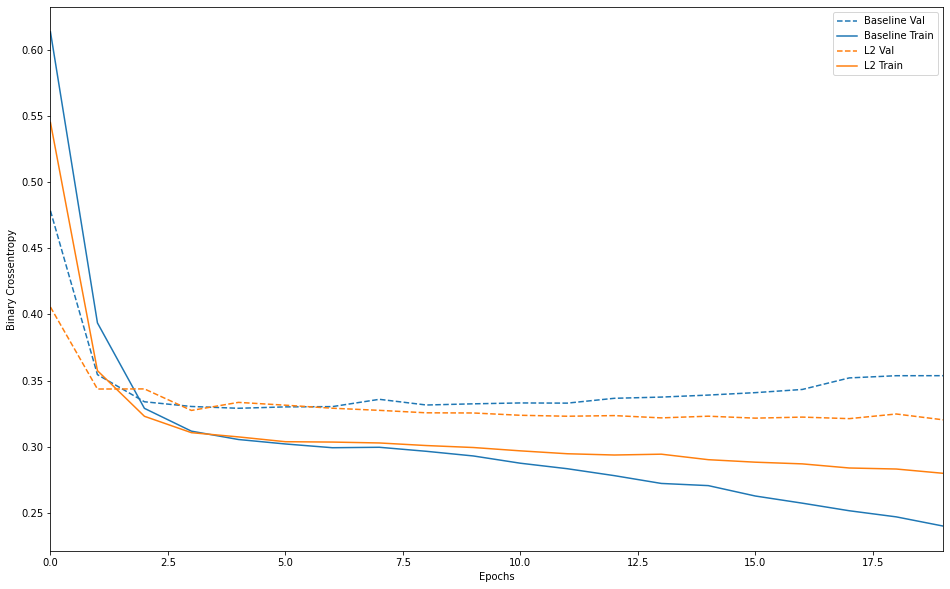

In [19]:
plot_history([('baseline', baseline_history), ('l2', l2_model_history)])

In [16]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.6771 - accuracy: 0.5713 - binary_crossentropy: 0.6771 - val_loss: 0.6146 - val_accuracy: 0.7542 - val_binary_crossentropy: 0.6146
Epoch 2/20
49/49 - 0s - loss: 0.5830 - accuracy: 0.7066 - binary_crossentropy: 0.5830 - val_loss: 0.4811 - val_accuracy: 0.8256 - val_binary_crossentropy: 0.4811
Epoch 3/20
49/49 - 0s - loss: 0.4998 - accuracy: 0.7764 - binary_crossentropy: 0.4998 - val_loss: 0.4027 - val_accuracy: 0.8476 - val_binary_crossentropy: 0.4027
Epoch 4/20
49/49 - 0s - loss: 0.4572 - accuracy: 0.8038 - binary_crossentropy: 0.4572 - val_loss: 0.3691 - val_accuracy: 0.8496 - val_binary_crossentropy: 0.3691
Epoch 5/20
49/49 - 0s - loss: 0.4214 - accuracy: 0.8250 - binary_crossentropy: 0.4214 - val_loss: 0.3496 - val_accuracy: 0.8553 - val_binary_crossentropy: 0.3496
Epoch 6/20
49/49 - 0s - loss: 0.4000 - accuracy: 0.8353 - binary_crossentropy: 0.4000 - val_loss: 0.3373 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3373
Epoch 7/20
49/49 - 0s - loss

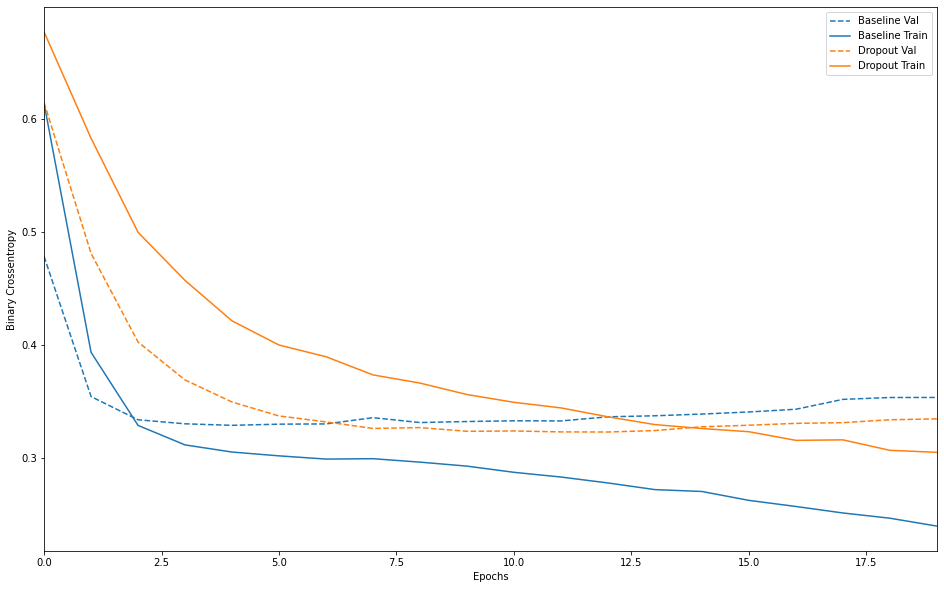

In [17]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])